In [ ]:
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import albumentations as A
from tensorflow.keras.applications import EfficientNetB1
#from keras.preprocessing.image import load_img
from keras.models import load_model
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/ASDRP/Experiments/simple-cnn-v3/df.csv')

In [ ]:
features[0][0]

array([[139, 152, 160],
       [144, 157, 165],
       [149, 161, 169],
       [154, 163, 172],
       [157, 166, 175],
       [163, 170, 177],
       [167, 173, 178],
       [169, 175, 180],
       [170, 176, 181],
       [172, 178, 183],
       [173, 180, 184],
       [175, 183, 183],
       [177, 185, 185],
       [179, 187, 187],
       [179, 187, 187],
       [180, 188, 188],
       [182, 189, 188],
       [183, 189, 188],
       [184, 190, 189],
       [185, 191, 190],
       [186, 192, 191],
       [187, 192, 193],
       [189, 193, 196],
       [191, 194, 197],
       [193, 196, 199],
       [193, 196, 200],
       [193, 196, 200],
       [194, 199, 198],
       [194, 199, 198],
       [196, 201, 200],
       [197, 202, 200],
       [195, 204, 201],
       [195, 204, 203],
       [195, 202, 204],
       [197, 204, 206],
       [149, 156, 159],
       [151, 158, 162],
       [181, 188, 192],
       [206, 210, 212],
       [208, 213, 214],
       [211, 216, 216],
       [211, 216

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        src = cv2.imread(image)
        # image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
        image = cv2.resize(src, (64,64), interpolation = cv2.INTER_AREA)
        norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        features.append(image)
        
    features = np.array(features)
    # ignore this step if using RGB
    #features = features.reshape(len(features), 128, 128, 3)
    return features


In [ ]:
# def extract_features(images):
#    features = []
#    for image in tqdm(images):
#         img = Image.open(image)
#         img = img.resize((128, 128), Image.ANTIALIAS)
#         img_inp = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
#         features.append(img_inp)
#    features = np.array(features)
#   # ignore this step if using RGB
#   #features = features.reshape(len(features), 128, 128, 3)
#    return features

features = extract_features(df.image)



100%|██████████| 5000/5000 [19:42<00:00,  4.23it/s]


In [ ]:
import pickle

file = open("/content/drive/MyDrive/ASDRP/Experiments/simple-cnn-v3/open_cv_features.pickle",'rb')

features = pickle.load(file)

In [ ]:
features.shape

(5000, 64, 64, 3)

In [ ]:
type(features) 

numpy.ndarray

In [ ]:
filehandler = open("/content/drive/MyDrive/ASDRP/Experiments/simple-cnn-v3/open_cv_features.pickle","wb")
pickle.dump(features,filehandler)
filehandler.close()

In [ ]:
features = cv2.normalize(features, features, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX)


array([[[[139, 152, 160],
         [144, 157, 165],
         [149, 161, 169],
         ...,
         [217, 219, 220],
         [216, 217, 220],
         [216, 217, 221]],

        [[144, 158, 165],
         [149, 162, 170],
         [154, 166, 174],
         ...,
         [220, 222, 223],
         [220, 222, 222],
         [220, 222, 222]],

        [[150, 165, 167],
         [153, 168, 170],
         [157, 171, 173],
         ...,
         [223, 225, 225],
         [223, 225, 225],
         [223, 225, 225]],

        ...,

        [[ 32,  51,  59],
         [ 27,  46,  54],
         [ 24,  43,  51],
         ...,
         [ 92, 119, 165],
         [ 72, 100, 143],
         [ 58,  85, 129]],

        [[ 31,  50,  58],
         [ 25,  44,  52],
         [ 21,  40,  48],
         ...,
         [ 84, 110, 155],
         [ 63,  90, 135],
         [ 51,  78, 122]],

        [[ 30,  48,  56],
         [ 23,  41,  50],
         [ 19,  37,  45],
         ...,
         [ 72, 100, 144],
        

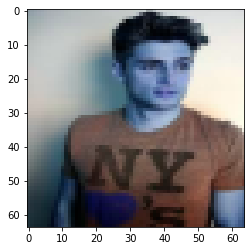

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(features[0], interpolation='nearest')
plt.show()

In [ ]:
import pickle
filehandler = open("/content/drive/MyDrive/ASDRP/Experiments/simple-cnn-v3/open_cv_features.pickle","wb")
pickle.dump(features,filehandler)
filehandler.close()

In [ ]:
indices = []
#black_total = 222
#asian_total = 834
#indian_total = 720
#others_total = 542
female_total = 1313

for i in tqdm(range(len(df))):

  if df.iloc[i]['gender'] == 1 and df.iloc[i]['race'] != 0 and female_total > 500:
    indices.append(i)
    female_total -= 1



100%|██████████| 5000/5000 [00:00<00:00, 6139.02it/s]


In [ ]:
df = df.drop(indices)
df = df.reset_index()



In [ ]:
images_reduced = []

for i in range(len(features)):
  if i not in indices:
    images_reduced.append(features[i])

In [ ]:
len(images_reduced)

4187

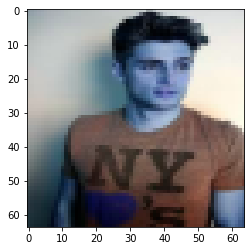

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(images_reduced[0], interpolation='nearest')
plt.show()

In [ ]:
y_gender = np.array(df['gender'])
y_race = np.array(df['race'])

In [ ]:
y_stack = np.vstack((y_gender,y_race))
Y = y_stack[0]

In [ ]:
val_images = pickle.load(open("/content/drive/MyDrive/ASDRP/Experiments/simple-cnn-v3/test_tensors_generated.pickle", "rb"))

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/ASDRP/Experiments/df_test.csv')  

In [ ]:
Y_val = np.array(df_val['gender'])

In [ ]:
test_indices = df.sample(n=837, random_state=40).index

In [ ]:
test_indices

Int64Index([1074, 1898,  619, 4095, 3357, 3300, 3352, 1226, 2737,  695,
            ...
             671, 1702, 2907, 1202, 1282, 1107, 2328, 3893, 1895, 1234],
           dtype='int64', length=837)

In [ ]:
test_images = []
for i in test_indices.tolist():
  test_images.append(features[i])

In [ ]:
y_gender_test = np.array(df.iloc[test_indices]['gender'])


In [ ]:
len(y_gender_test)

837

In [ ]:
len(Y)

4187

In [ ]:
images_reduced = np.array(images_reduced)
Y = np.array(Y)

In [ ]:
test_images = np.array(test_images)

In [ ]:
df

index                                              image  age  gender  \
0         0  drive/My Drive/ASDRP/Data/utk_cropped/part1/20...   20       0   
1         1  drive/My Drive/ASDRP/Data/utk_cropped/part1/21...   21       0   
2         2  drive/My Drive/ASDRP/Data/utk_cropped/part1/18...   18       0   
3         3  drive/My Drive/ASDRP/Data/utk_cropped/part1/31...   31       0   
4         4  drive/My Drive/ASDRP/Data/utk_cropped/part1/12...   12       0   
...     ...                                                ...  ...     ...   
4182   4995  drive/My Drive/ASDRP/Data/utk_cropped/part1/69...   69       1   
4183   4996  drive/My Drive/ASDRP/Data/utk_cropped/part1/57...   57       1   
4184   4997  drive/My Drive/ASDRP/Data/utk_cropped/part1/53...   53       1   
4185   4998  drive/My Drive/ASDRP/Data/utk_cropped/part1/59...   59       1   
4186   4999  drive/My Drive/ASDRP/Data/utk_cropped/part1/37...   37       0   

      race  
0        0  
1        0  
2        3  
3        3  
4        3  
...    ...  
4182     0  
4183     0  
4184     0  
4185     0  
4186     0  

[4187 rows x 5 columns]

In [ ]:
import os
import random
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Reshape, Dense, Dropout, \
    Activation, LeakyReLU, Conv2D, Conv2DTranspose, Embedding, \
    Concatenate, multiply, Flatten, BatchNormalization
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# %% --------------------------------------- Fix Seeds -----------------------------------------------------------------
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
weight_init = glorot_normal(seed=SEED)

# %% ---------------------------------- Data Preparation ---------------------------------------------------------------
def change_image_shape(images):
    shape_tuple = images.shape
    if len(shape_tuple) == 3:
        images = images.reshape(-1, shape_tuple[-1], shape_tuple[-1], 1)
    elif shape_tuple == 4 and shape_tuple[-1] > 3:
        images = images.reshape(-1, shape_tuple[-1], shape_tuple[-1], shape_tuple[1])
    return images

######################## MNIST / CIFAR ##########################
# # Load MNIST Fashion
# # Load CIFAR-10
# from tensorflow.keras.datasets.cifar10 import load_data

# # Load training set
images, labels = images_reduced, Y
# images = change_image_shape(images)

# labels = labels.reshape(-1)
# # # # Convert from ints to floats
# # # images = images.astype('float32')

# # Create imbalanced version
# for c in range(1, 10):
#     images = np.vstack([images[labels!=c], images[labels==c][:100*c]])
#     labels = np.append(labels[labels!=c], np.ones(100*c) * c)

######################## Our Dataset ##########################
# # Use our datasets
# images = np.load('x_train.npy')
# labels = np.load('y_train.npy')
# images = change_image_shape(images)

######################## Preprocessing ##########################
# Set channel
channel = images.shape[-1]

# to 64 x 64 x channel
# real = np.ndarray(shape=(images.shape[0], 64, 64, channel))
# for i in range(images.shape[0]):
#     real[i] = cv2.resize(images[i], (64, 64)).reshape((64, 64, channel))

# Train test split, for autoencoder (actually, this step is redundant if we already have test set)
# x_train, x_test, y_train, y_test = train_test_split(real, labels, test_size=0.3, shuffle=True, random_state=42)

# It is suggested to use [-1, 1] input for GAN training
x_train = (images.astype('float32') - 255) / 255
x_test = (test_images.astype('float32') - 255) / 255

# Get image size
x_train = x_train
x_test = x_test
img_size = x_train[0].shape
y_train = labels
# Get number of classes
n_classes = len(np.unique(y_train))

# %% ---------------------------------- Hyperparameters ----------------------------------------------------------------

optimizer = Adam(lr=0.0002, beta_1=0.5, beta_2=0.9)
latent_dim=128
# trainRatio === times(Train D) / times(Train G)
trainRatio = 5

# %% ---------------------------------- Models Setup -------------------------------------------------------------------
# Build Generator/Decoder
def decoder():
    # weight initialization
    init = RandomNormal(stddev=0.02)

    noise_le = Input((latent_dim,))

    x = Dense(4*4*256)(noise_le)
    x = LeakyReLU(alpha=0.2)(x)

    ## Size: 4 x 4 x 256
    x = Reshape((4, 4, 256))(x)

    ## Size: 8 x 8 x 128
    x = Conv2DTranspose(filters=128,
                        kernel_size=(4, 4),
                        strides=(2, 2),
                        padding='same',
                        kernel_initializer=init)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.2)(x)

    ## Size: 16 x 16 x 128
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.2)(x)

    ## Size: 32 x 32 x 64
    x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.2)(x)

    ## Size: 64 x 64 x 3
    generated = Conv2DTranspose(channel, (4, 4), strides=(2, 2), padding='same', activation='tanh', kernel_initializer=init)(x)


    generator = Model(inputs=noise_le, outputs=generated)
    return generator

# Build Encoder
def encoder():
    # weight initialization
    init = RandomNormal(stddev=0.02)

    img = Input(img_size)

    x = Conv2D(64, kernel_size=(4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(img)
    # x = LayerNormalization()(x) # It is not suggested to use BN in Discriminator of WGAN
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    # x = LayerNormalization()(x)
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    # x = LayerNormalization()(x)
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Conv2D(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    # x = LayerNormalization()(x)
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    # 4 x 4 x 256
    feature = Flatten()(x)

    feature = Dense(latent_dim)(feature)
    out = LeakyReLU(0.2)(feature)

    model = Model(inputs=img, outputs=out)
    return model

# Build Embedding model
def embedding_labeled_latent():
    # # weight initialization
    # init = RandomNormal(stddev=0.02)

    label = Input((1,), dtype='int32')
    noise = Input((latent_dim,))
    # ne = Dense(256)(noise)
    # ne = LeakyReLU(0.2)(ne)

    le = Flatten()(Embedding(n_classes, latent_dim)(label))
    # le = Dense(256)(le)
    # le = LeakyReLU(0.2)(le)

    noise_le = multiply([noise, le])
    # noise_le = Dense(latent_dim)(noise_le)

    model = Model([noise, label], noise_le)

    return model

# Build Autoencoder
def autoencoder_trainer(encoder, decoder, embedding):

    label = Input((1,), dtype='int32')
    img = Input(img_size)

    latent = encoder(img)
    labeled_latent = embedding([latent, label])
    rec_img = decoder(labeled_latent)
    model = Model([img, label], rec_img)

    model.compile(optimizer=optimizer, loss='mae')
    return model


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


array([[[-0.45490196, -0.40392157, -0.37254903],
        [-0.43529412, -0.38431373, -0.3529412 ],
        [-0.41568628, -0.36862746, -0.3372549 ],
        ...,
        [-0.14901961, -0.14117648, -0.13725491],
        [-0.15294118, -0.14901961, -0.13725491],
        [-0.15294118, -0.14901961, -0.13333334]],

       [[-0.43529412, -0.38039216, -0.3529412 ],
        [-0.41568628, -0.3647059 , -0.33333334],
        [-0.39607844, -0.34901962, -0.31764707],
        ...,
        [-0.13725491, -0.12941177, -0.1254902 ],
        [-0.13725491, -0.12941177, -0.12941177],
        [-0.13725491, -0.12941177, -0.12941177]],

       [[-0.4117647 , -0.3529412 , -0.34509805],
        [-0.4       , -0.34117648, -0.33333334],
        [-0.38431373, -0.32941177, -0.32156864],
        ...,
        [-0.1254902 , -0.11764706, -0.11764706],
        [-0.1254902 , -0.11764706, -0.11764706],
        [-0.1254902 , -0.11764706, -0.11764706]],

       ...,

       [[-0.8745098 , -0.8       , -0.76862746],
        [-0

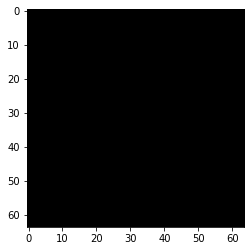

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(x_train[0], interpolation='nearest')
plt.show()

In [ ]:
en = encoder()
de = decoder()
em = embedding_labeled_latent()
ae = autoencoder_trainer(en, de, em)

In [ ]:
len(Y_val)

1000

In [ ]:
x_train.shape

(2930, 64, 64, 3)

In [ ]:
y_train.shape

(2930, 1)

In [ ]:
y_train = y_train.reshape((2930,1))

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
type(val_images)

list

In [ ]:
val_images = np.array(val_images)

In [ ]:
val_images.shape

(1000, 64, 64, 3)

In [ ]:
Y_val = np.array(Y_val)
Y_val = Y_val.reshape((len(Y_val),1))

In [ ]:
x_test[0]

In [ ]:
ae.fit([x_train, y_train], x_train,
       epochs=30,
       batch_size=128,
       shuffle=True,
       validation_data=([x_test, y_gender_test], x_test))

Epoch 1/30
33/33 [==============================] - 2s 64ms/step - loss: 0.0958 - val_loss: 132.1461
Epoch 2/30
33/33 [==============================] - 2s 56ms/step - loss: 0.0941 - val_loss: 132.1467
Epoch 3/30
33/33 [==============================] - 2s 56ms/step - loss: 0.0923 - val_loss: 132.1459
Epoch 4/30
33/33 [==============================] - 2s 56ms/step - loss: 0.0912 - val_loss: 132.1451
Epoch 5/30
33/33 [==============================] - 2s 56ms/step - loss: 0.0905 - val_loss: 132.1448
Epoch 6/30
33/33 [==============================] - 2s 57ms/step - loss: 0.0894 - val_loss: 132.1455
Epoch 7/30
33/33 [==============================] - 2s 61ms/step - loss: 0.0890 - val_loss: 132.1462
Epoch 8/30
33/33 [==============================] - 2s 61ms/step - loss: 0.0876 - val_loss: 132.1431
Epoch 9/30
33/33 [==============================] - 2s 67ms/step - loss: 0.0872 - val_loss: 132.1463
Epoch 10/30
33/33 [==============================] - 2s 60ms/step - loss: 0.0866 - val_loss

In [ ]:
x_test[0]

array([[[-0.04313726, -0.0627451 , -0.05882353],
        [-0.03921569, -0.05882353, -0.05490196],
        [-0.03529412, -0.05490196, -0.05098039],
        ...,
        [-0.04705882, -0.04705882, -0.04705882],
        [-0.04705882, -0.04705882, -0.04705882],
        [-0.04705882, -0.04705882, -0.04705882]],

       [[-0.05098039, -0.07058824, -0.06666667],
        [-0.04705882, -0.06666667, -0.0627451 ],
        [-0.03921569, -0.05882353, -0.05490196],
        ...,
        [-0.05490196, -0.05490196, -0.05490196],
        [-0.05490196, -0.05490196, -0.05490196],
        [-0.05490196, -0.05490196, -0.05490196]],

       [[-0.04705882, -0.06666667, -0.0627451 ],
        [-0.04313726, -0.0627451 , -0.05882353],
        [-0.03529412, -0.05490196, -0.05098039],
        ...,
        [-0.05098039, -0.05098039, -0.05098039],
        [-0.05098039, -0.05098039, -0.05098039],
        [-0.05098039, -0.05098039, -0.05098039]],

       ...,

       [[-0.8862745 , -0.81960785, -0.627451  ],
        [-0

In [ ]:
decoded_imgs = ae.predict([x_test, y_gender_test])

In [ ]:
decoded_imgs[0]

array([[[-0.07531614, -0.08131465, -0.09713466],
        [-0.08520133, -0.08165218, -0.08966858],
        [-0.07223868, -0.07426002, -0.07356173],
        ...,
        [-0.03324019, -0.03581588, -0.04351058],
        [-0.0326952 , -0.04232617, -0.05311124],
        [-0.05427394, -0.04457307, -0.05472012]],

       [[-0.08398584, -0.09269782, -0.10088873],
        [-0.07172973, -0.06628423, -0.08622557],
        [-0.07225282, -0.05365646, -0.07595777],
        ...,
        [-0.02802124, -0.04359796, -0.04337415],
        [-0.03751043, -0.04671958, -0.0557461 ],
        [-0.05101727, -0.05024287, -0.05083304]],

       [[-0.08779805, -0.08667056, -0.09765278],
        [-0.0728778 , -0.07226043, -0.09551442],
        [-0.06222434, -0.06398126, -0.0635824 ],
        ...,
        [-0.02222916, -0.04375597, -0.04683645],
        [-0.01920195, -0.04697692, -0.04670757],
        [-0.03887658, -0.04332691, -0.04098681]],

       ...,

       [[-0.8145268 , -0.80115086, -0.7831075 ],
        [-0

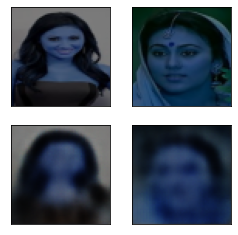

In [ ]:
n = n_classes
plt.figure(figsize=(2*n, 4))
decoded_imgs = decoded_imgs*0.5 + 0.5
x_real = x_test*0.5 + 0.5
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    if channel == 3:
        plt.imshow(x_real[y_gender_test==i][0].reshape(64, 64, channel))
    else:
        plt.imshow(x_real[y_gender_test==i][0].reshape(64, 64))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    if channel == 3:
        plt.imshow(decoded_imgs[y_gender_test==i][0].reshape(64, 64, channel))
    else:
        plt.imshow(decoded_imgs[y_gender_test==i][0].reshape(64, 64))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
def discriminator_cwgan():
    # weight initialization
    init = RandomNormal(stddev=0.02)

    img = Input(img_size)
    label = Input((1,), dtype='int32')


    x = Conv2D(64, kernel_size=(4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(img)
    # x = LayerNormalization()(x) # It is not suggested to use BN in Discriminator of WGAN
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    # x = LayerNormalization()(x)
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    # x = LayerNormalization()(x)
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Conv2D(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(x)
    # x = LayerNormalization()(x)
    x = LeakyReLU(0.2)(x)
    # x = Dropout(0.3)(x)

    x = Flatten()(x)

    le = Flatten()(Embedding(n_classes, 512)(label))
    le = Dense(4 * 4 * 256)(le)
    le = LeakyReLU(0.2)(le)
    x_y = multiply([x, le])
    x_y = Dense(512)(x_y)

    out = Dense(1)(x_y)

    model = Model(inputs=[img, label], outputs=out)

    return model

# %% ----------------------------------- BAGAN-GP Part -----------------------------------------------------------------
# Refer to the WGAN-GP Architecture. https://github.com/keras-team/keras-io/blob/master/examples/generative/wgan_gp.py
# Build our BAGAN-GP
class BAGAN_GP(Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=3,
        gp_weight=10.0,
    ):
        super(BAGAN_GP, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.train_ratio = trainRatio
        self.gp_weight = gp_weight

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(BAGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images, labels):
        """ Calculates the gradient penalty.
        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # get the interplated image
        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator([interpolated, labels], training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calcuate the norm of the gradients
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, data):
        if isinstance(data, tuple):
            real_images = data[0]
            labels = data[1]

        # Get the batch size
        batch_size = tf.shape(real_images)[0]

        ########################### Train the Discriminator ###########################
        # For each batch, we are going to perform cwgan-like process
        for i in range(self.train_ratio):
            # Get the latent vector
            random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            fake_labels = tf.random.uniform((batch_size,), 0, n_classes)
            wrong_labels = tf.random.uniform((batch_size,), 0, n_classes)
            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_images = self.generator([random_latent_vectors, fake_labels], training=True)
                # Get the logits for the fake images
                fake_logits = self.discriminator([fake_images, fake_labels], training=True)
                # Get the logits for real images
                real_logits = self.discriminator([real_images, labels], training=True)
                # Get the logits for wrong label classification
                wrong_label_logits = self.discriminator([real_images, wrong_labels], training=True)

                # Calculate discriminator loss using fake and real logits
                d_cost = self.d_loss_fn(real_logits=real_logits, fake_logits=fake_logits,
                                        wrong_label_logits=wrong_label_logits
                                        )

                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images, labels)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )

        ########################### Train the Generator ###########################
        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        fake_labels = tf.random.uniform((batch_size,), 0, n_classes)
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_images = self.generator([random_latent_vectors, fake_labels], training=True)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator([generated_images, fake_labels], training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        return {"d_loss": d_loss, "g_loss": g_loss}

# Optimizer for both the networks
# learning_rate=0.0002, beta_1=0.5, beta_2=0.9 are recommended
generator_optimizer = Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)


# We refer to the DRAGAN loss function. https://github.com/kodalinaveen3/DRAGAN
# Define the loss functions to be used for discrimiator
# We will add the gradient penalty later to this loss function
def discriminator_loss(real_logits, fake_logits, wrong_label_logits):
    real_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=real_logits, labels=tf.ones_like(real_logits)))
    fake_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logits, labels=tf.zeros_like(fake_logits)))
    wrong_label_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=wrong_label_logits, labels=tf.zeros_like(fake_logits)))

    return wrong_label_loss + fake_loss + real_loss

# Define the loss functions to be used for generator
def generator_loss(fake_logits):
    fake_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logits, labels=tf.ones_like(fake_logits)))
    return fake_loss

# build generator with pretrained decoder and embedding
def generator_label(embedding, decoder):
    # # Embedding model needs to be trained along with GAN training
    # embedding.trainable = False

    label = Input((1,), dtype='int32')
    latent = Input((latent_dim,))

    labeled_latent = embedding([latent, label])
    gen_img = decoder(labeled_latent)
    model = Model([latent, label], gen_img)

    return model

# Build discriminator with pre-trained Encoder
def build_discriminator(encoder):

    label = Input((1,), dtype='int32')
    img = Input(img_size)

    inter_output_model = Model(inputs=encoder.input, outputs=encoder.layers[-3].output)
    x = inter_output_model(img)

    le = Flatten()(Embedding(n_classes, 512)(label))
    le = Dense(4 * 4 * 256)(le)
    le = LeakyReLU(0.2)(le)
    x_y = multiply([x, le])
    x_y = Dense(512)(x_y)

    out = Dense(1)(x_y)

    model = Model(inputs=[img, label], outputs=out)

    return model

In [ ]:
# d_model = build_discriminator(en)  # initialized with Encoder
d_model = discriminator_cwgan()  # without initialization
g_model = generator_label(em, de)  # initialized with Decoder and Embedding

bagan_gp = BAGAN_GP(
    discriminator=d_model,
    generator=g_model,
    latent_dim=latent_dim,
    discriminator_extra_steps=3,
)

# Compile the model
bagan_gp.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
)


In [ ]:
def plt_img(generator, epoch):
    np.random.seed(42)
    latent_gen = np.random.normal(size=(n_classes, latent_dim))

    x_real = x_test * 0.5 + 0.5
    n = n_classes

    plt.figure(figsize=(2*n, 2*(n+1)))
    for i in range(n):
        # display original
        ax = plt.subplot(n+1, n, i + 1)
        if channel == 3:
            plt.imshow(x_real[y_gender_test==i][4].reshape(64, 64, channel))
        else:
            plt.imshow(x_real[y_gender_test == i][4].reshape(64, 64))
            plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for c in range(n):
            decoded_imgs = generator.predict([latent_gen, np.ones(n)*c])
            decoded_imgs = decoded_imgs * 0.5 + 0.5
            # display generation
            ax = plt.subplot(n+1, n, (i+1)*n + 1 + c)
            if channel == 3:
                plt.imshow(decoded_imgs[i].reshape(64, 64, channel))
            else:
                plt.imshow(decoded_imgs[i].reshape(64, 64))
                plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.savefig('/content/drive/MyDrive/ASDRP/Experiments/BAGAN_generated_fakes/generated_plot_%d.png' % epoch)
    plt.show()
    return


In [ ]:
d_loss_history = []
g_loss_history = []

LEARNING STEP #  1 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 668ms/step - d_loss: 1.8848 - g_loss: 2.6755
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.7542 - g_loss: 2.3759


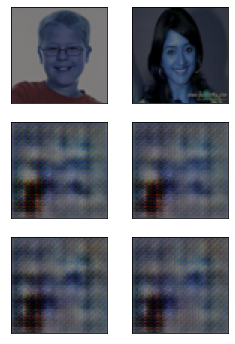

LEARNING STEP #  2 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.6793 - g_loss: 2.3371
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.5909 - g_loss: 2.8365


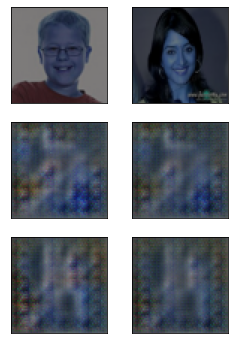

LEARNING STEP #  3 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 668ms/step - d_loss: 1.6192 - g_loss: 2.7514
Epoch 2/2
33/33 [==============================] - 23s 688ms/step - d_loss: 1.6668 - g_loss: 2.2754


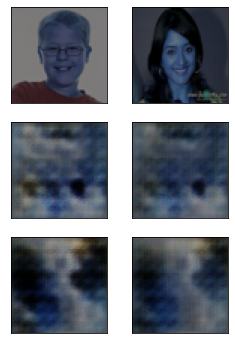

LEARNING STEP #  4 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.6360 - g_loss: 2.2426
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.5983 - g_loss: 2.3589


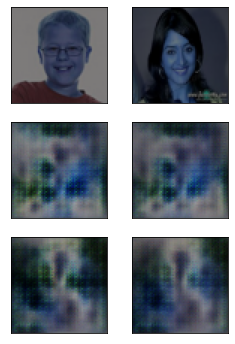

LEARNING STEP #  5 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 673ms/step - d_loss: 1.6134 - g_loss: 2.3938
Epoch 2/2
33/33 [==============================] - 22s 664ms/step - d_loss: 1.6025 - g_loss: 2.2060


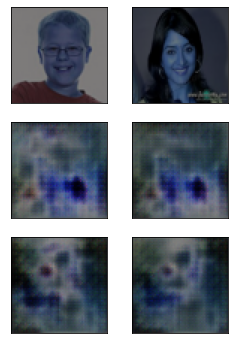

LEARNING STEP #  6 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 669ms/step - d_loss: 1.5977 - g_loss: 2.2633
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.5705 - g_loss: 2.3098


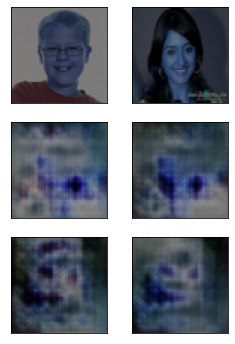

LEARNING STEP #  7 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.5792 - g_loss: 2.3163
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.5627 - g_loss: 2.2508


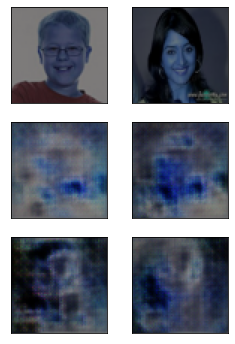

LEARNING STEP #  8 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.5329 - g_loss: 2.2666
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.5322 - g_loss: 2.2761


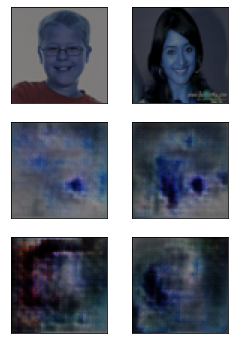

LEARNING STEP #  9 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 667ms/step - d_loss: 1.5221 - g_loss: 2.3017
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.5049 - g_loss: 2.3643


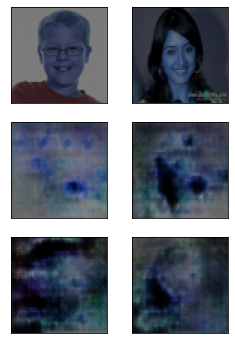

LEARNING STEP #  10 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.5083 - g_loss: 2.2329
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.4699 - g_loss: 2.2142


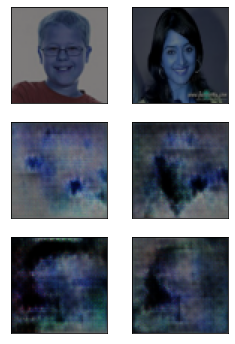

LEARNING STEP #  11 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 667ms/step - d_loss: 1.4689 - g_loss: 2.2803
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.4342 - g_loss: 2.3047


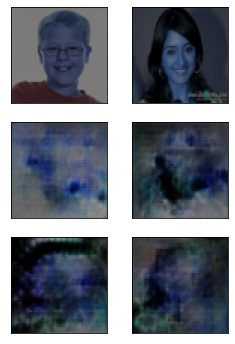

LEARNING STEP #  12 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.4127 - g_loss: 2.3308
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.4246 - g_loss: 2.3102


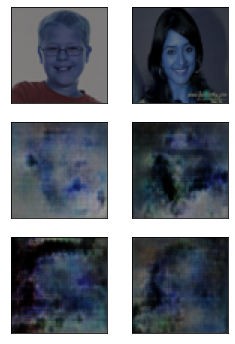

LEARNING STEP #  13 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 667ms/step - d_loss: 1.3867 - g_loss: 2.3908
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.3878 - g_loss: 2.2772


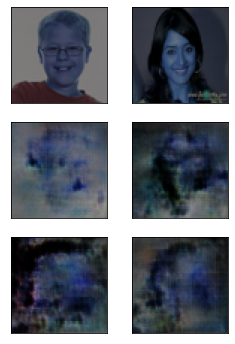

LEARNING STEP #  14 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 672ms/step - d_loss: 1.3573 - g_loss: 2.3681
Epoch 2/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.3612 - g_loss: 2.3283


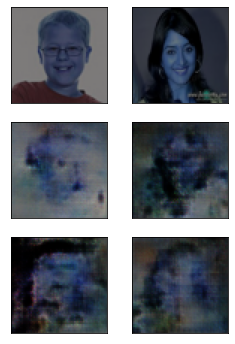

LEARNING STEP #  15 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.3555 - g_loss: 2.3693
Epoch 2/2
33/33 [==============================] - 22s 676ms/step - d_loss: 1.3303 - g_loss: 2.2631


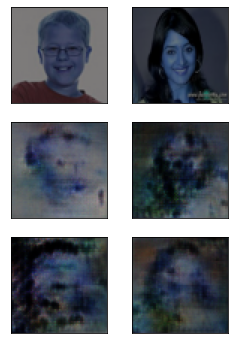

LEARNING STEP #  16 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 672ms/step - d_loss: 1.3379 - g_loss: 2.4418
Epoch 2/2
33/33 [==============================] - 22s 669ms/step - d_loss: 1.3341 - g_loss: 2.2986


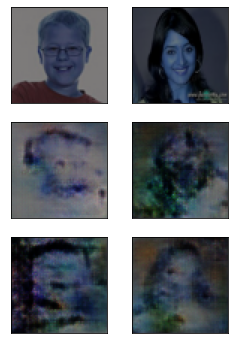

LEARNING STEP #  17 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 668ms/step - d_loss: 1.3108 - g_loss: 2.4071
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.3126 - g_loss: 2.4405


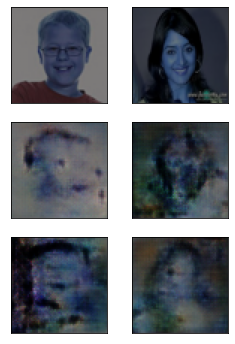

LEARNING STEP #  18 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.3091 - g_loss: 2.3532
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.3116 - g_loss: 2.3787


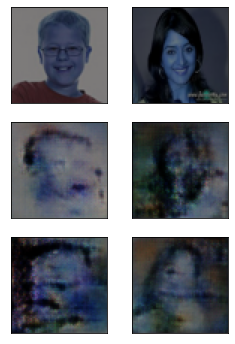

LEARNING STEP #  19 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.3068 - g_loss: 2.3078
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2945 - g_loss: 2.2251


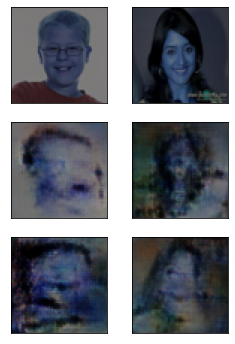

LEARNING STEP #  20 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 667ms/step - d_loss: 1.2961 - g_loss: 2.3838
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2884 - g_loss: 2.3776


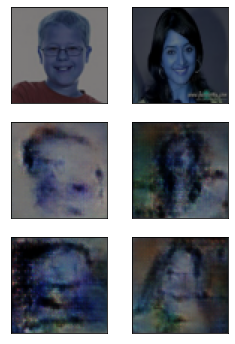

LEARNING STEP #  21 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.2899 - g_loss: 2.3756
Epoch 2/2
33/33 [==============================] - 22s 664ms/step - d_loss: 1.2799 - g_loss: 2.3230


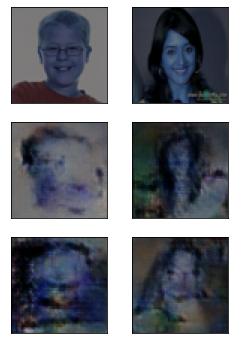

LEARNING STEP #  22 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.2846 - g_loss: 2.2289
Epoch 2/2
33/33 [==============================] - 22s 674ms/step - d_loss: 1.2795 - g_loss: 2.3176


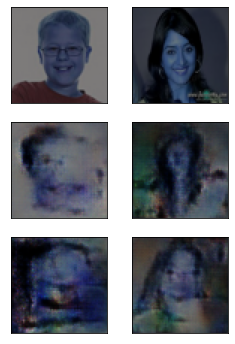

LEARNING STEP #  23 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 668ms/step - d_loss: 1.2627 - g_loss: 2.3467
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2736 - g_loss: 2.2289


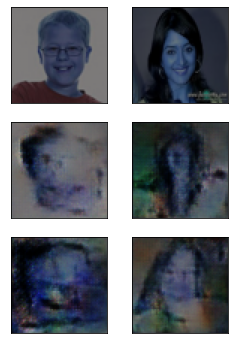

LEARNING STEP #  24 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 671ms/step - d_loss: 1.2637 - g_loss: 2.2671
Epoch 2/2
33/33 [==============================] - 22s 664ms/step - d_loss: 1.2543 - g_loss: 2.2416


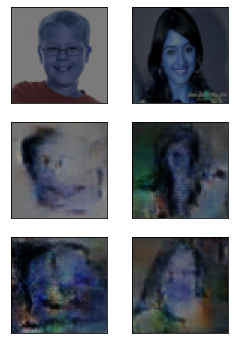

LEARNING STEP #  25 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.2605 - g_loss: 2.3781
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.2642 - g_loss: 2.3882


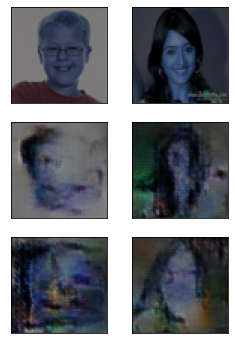

LEARNING STEP #  26 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.2376 - g_loss: 2.3624
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2452 - g_loss: 2.3099


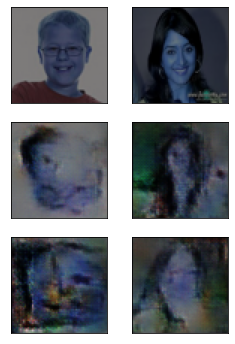

LEARNING STEP #  27 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.2434 - g_loss: 2.3540
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2453 - g_loss: 2.2653


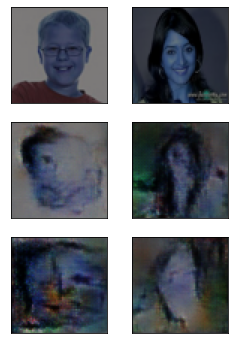

LEARNING STEP #  28 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.2360 - g_loss: 2.3488
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2380 - g_loss: 2.2870


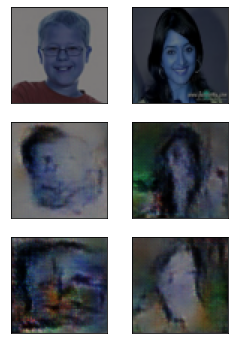

LEARNING STEP #  29 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 672ms/step - d_loss: 1.2485 - g_loss: 2.3206
Epoch 2/2
33/33 [==============================] - 22s 664ms/step - d_loss: 1.2400 - g_loss: 2.2937


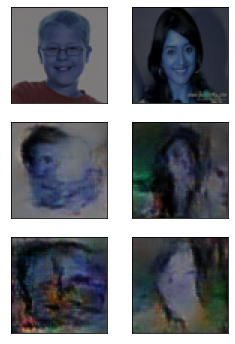

LEARNING STEP #  30 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.2363 - g_loss: 2.2902
Epoch 2/2
33/33 [==============================] - 22s 675ms/step - d_loss: 1.2503 - g_loss: 2.3175


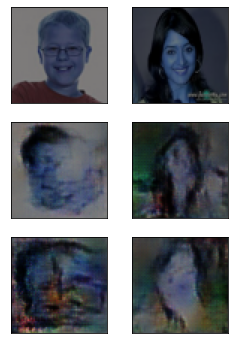

LEARNING STEP #  31 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 668ms/step - d_loss: 1.2403 - g_loss: 2.3319
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2425 - g_loss: 2.2547


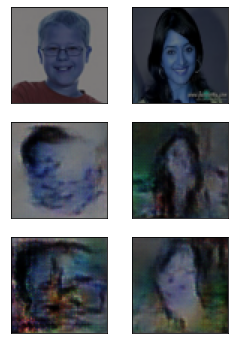

LEARNING STEP #  32 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.2210 - g_loss: 2.3181
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2223 - g_loss: 2.2980


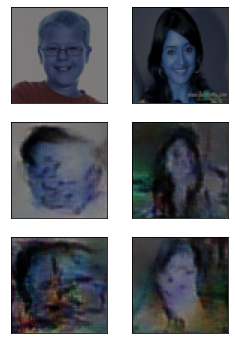

LEARNING STEP #  33 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 667ms/step - d_loss: 1.2361 - g_loss: 2.3453
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2221 - g_loss: 2.3154


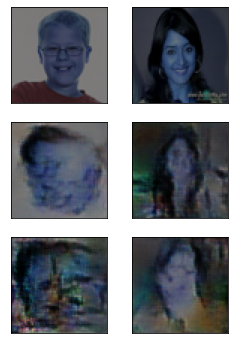

LEARNING STEP #  34 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 666ms/step - d_loss: 1.2306 - g_loss: 2.3179
Epoch 2/2
33/33 [==============================] - 23s 687ms/step - d_loss: 1.2289 - g_loss: 2.3354


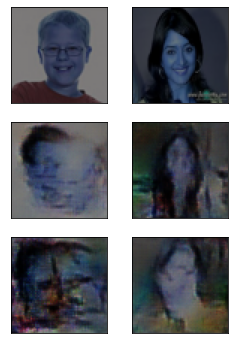

LEARNING STEP #  35 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.2182 - g_loss: 2.3253
Epoch 2/2
33/33 [==============================] - 22s 663ms/step - d_loss: 1.2066 - g_loss: 2.2727


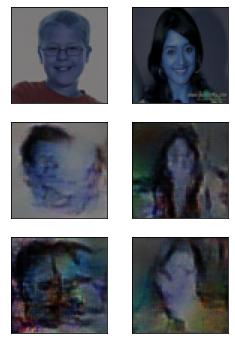

LEARNING STEP #  36 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.2019 - g_loss: 2.3190
Epoch 2/2
33/33 [==============================] - 23s 688ms/step - d_loss: 1.2180 - g_loss: 2.3207


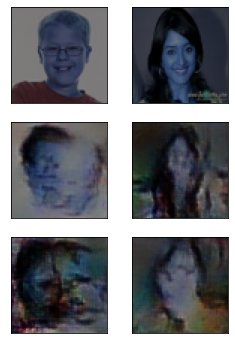

LEARNING STEP #  37 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 669ms/step - d_loss: 1.1991 - g_loss: 2.3370
Epoch 2/2
33/33 [==============================] - 22s 664ms/step - d_loss: 1.2181 - g_loss: 2.3367


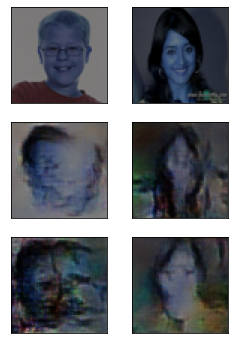

LEARNING STEP #  38 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 669ms/step - d_loss: 1.2100 - g_loss: 2.3156
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2095 - g_loss: 2.3536


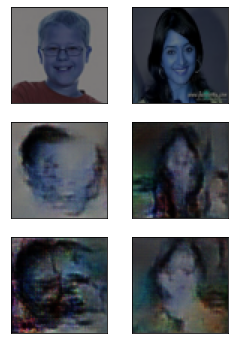

LEARNING STEP #  39 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.2006 - g_loss: 2.3441
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2171 - g_loss: 2.3519


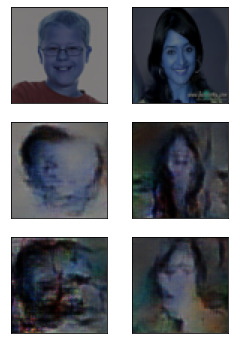

LEARNING STEP #  40 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 667ms/step - d_loss: 1.1957 - g_loss: 2.3682
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.1998 - g_loss: 2.3463


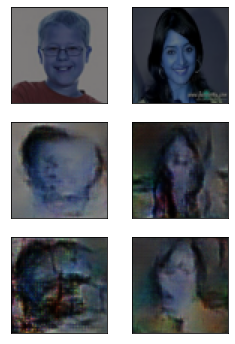

LEARNING STEP #  41 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 671ms/step - d_loss: 1.1875 - g_loss: 2.3628
Epoch 2/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.2111 - g_loss: 2.3948


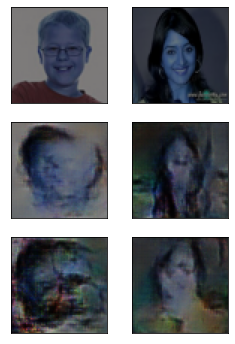

LEARNING STEP #  42 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 669ms/step - d_loss: 1.1952 - g_loss: 2.3622
Epoch 2/2
33/33 [==============================] - 23s 686ms/step - d_loss: 1.2044 - g_loss: 2.3585


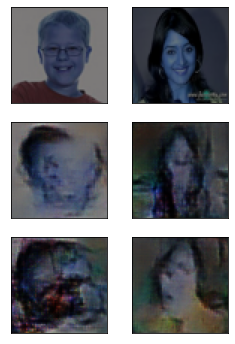

LEARNING STEP #  43 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 670ms/step - d_loss: 1.1897 - g_loss: 2.3812
Epoch 2/2
33/33 [==============================] - 22s 664ms/step - d_loss: 1.1911 - g_loss: 2.3940


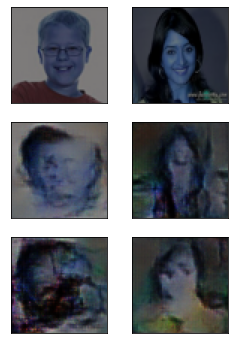

LEARNING STEP #  44 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 671ms/step - d_loss: 1.1929 - g_loss: 2.3672
Epoch 2/2
33/33 [==============================] - 22s 676ms/step - d_loss: 1.1895 - g_loss: 2.3848


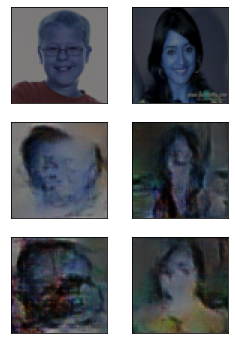

LEARNING STEP #  45 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 665ms/step - d_loss: 1.1772 - g_loss: 2.3633
Epoch 2/2
33/33 [==============================] - 22s 663ms/step - d_loss: 1.1842 - g_loss: 2.3623


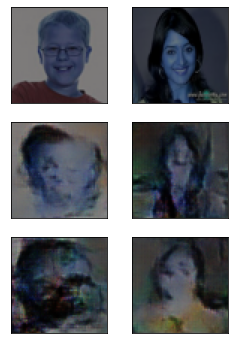

LEARNING STEP #  46 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 22s 654ms/step - d_loss: 1.1752 - g_loss: 2.3657
Epoch 2/2
33/33 [==============================] - 22s 662ms/step - d_loss: 1.1857 - g_loss: 2.3907


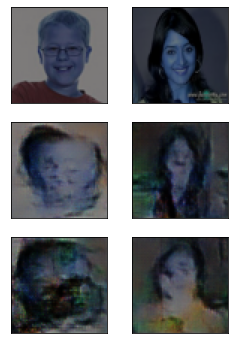

LEARNING STEP #  47 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 21s 632ms/step - d_loss: 1.1886 - g_loss: 2.3636
Epoch 2/2
33/33 [==============================] - 21s 641ms/step - d_loss: 1.1864 - g_loss: 2.3602


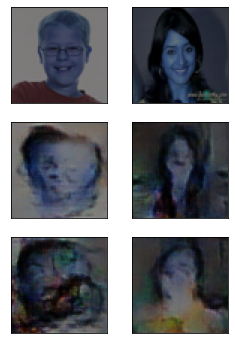

LEARNING STEP #  48 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 21s 627ms/step - d_loss: 1.1861 - g_loss: 2.4272
Epoch 2/2
33/33 [==============================] - 21s 635ms/step - d_loss: 1.1821 - g_loss: 2.3547


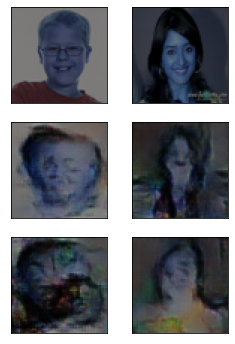

LEARNING STEP #  49 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 21s 638ms/step - d_loss: 1.1658 - g_loss: 2.3995
Epoch 2/2
33/33 [==============================] - 21s 638ms/step - d_loss: 1.1722 - g_loss: 2.3602


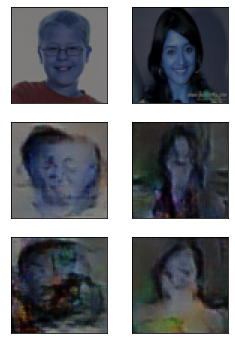

LEARNING STEP #  50 --------------------------------------------------
Epoch 1/2
33/33 [==============================] - 21s 627ms/step - d_loss: 1.1825 - g_loss: 2.3910
Epoch 2/2
33/33 [==============================] - 21s 634ms/step - d_loss: 1.1743 - g_loss: 2.3655


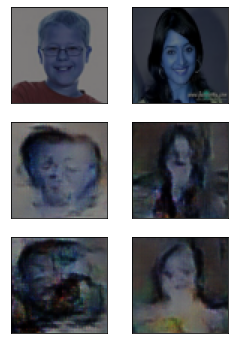

In [ ]:
LEARNING_STEPS = 400
for learning_step in range(LEARNING_STEPS):
    print('LEARNING STEP # ', learning_step + 1, '-' * 50)
    bagan_gp.fit(x_train, y_train, batch_size=128, epochs=2)
    d_loss_history += bagan_gp.history.history['d_loss']
    g_loss_history += bagan_gp.history.history['g_loss']
    if (learning_step+1)%1 == 0:
        plt_img(bagan_gp.generator, learning_step)